# Logistic Regression

Logistic Regression Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.29
F1-Score: 0.37

Confusion Matrix:
[[3527 1441]
 [3571 1461]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.58      4968
           1       0.50      0.29      0.37      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.50      0.50      0.48     10000



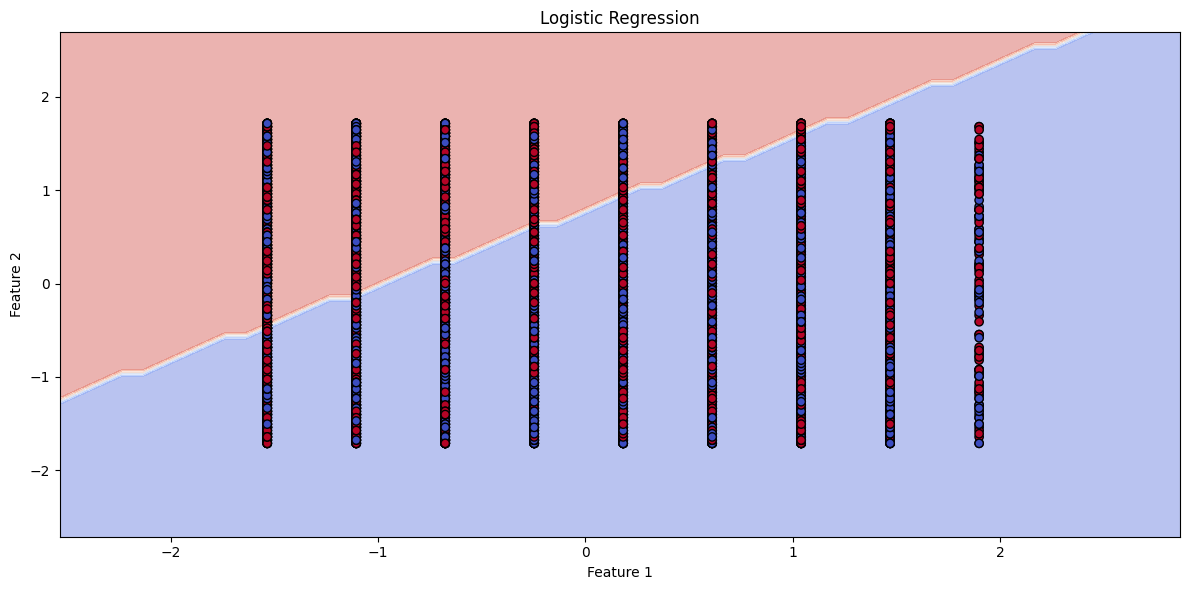

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
bots_df = pd.read_csv('bot_processed.csv')
features = ['word_count', 'retweet_count']
# features = ['follower_count', 'engagement_ratio', 'has_hashtag', 'has_link', 'has_mention', 'is_verified_int', 'word_count', 'retweet_count']
X = bots_df[features]
y = bots_df['bot_label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    # Create mesh grid for the first two features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict classes over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting for Logistic Regression
fig, ax = plt.subplots(figsize=(12, 6))

# Using only the first two features for visualization
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train model again using only the first two features for visualization
log_reg_2D = LogisticRegression(random_state=42)
log_reg_2D.fit(X_train_2D, y_train)

# Plot Logistic Regression decision boundary
plot_decision_boundary(log_reg_2D, X_test_2D, y_test, ax, "Logistic Regression")

plt.tight_layout()
plt.show()